In [29]:
import math   ## importing the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
h= float(input('the value of precision is:'))

the value of precision is:0.1


In [31]:
n=int(1/h)
matA= np.zeros((n+2,n+2))
lowerA=np.zeros((n+2,n+2))
upperA=np.zeros((n+2,n+2))
matB=np.zeros(n+2)
Y=np.zeros(n+2)
X=np.zeros(n+2)

In [32]:
for i in range (0,n+2):
    if i==0:
        matA[i][i]= 1;
    elif i==n+1:
        matA[i][i]=1;
        matA[i][i-2]=-1
    else:
        matA[i][i]=-(2+h**2);
        matA[i][i-1]=1
        matA[i][i+1]=1

In [33]:
print(matA)

[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.   -2.01  1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.   -2.01  1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.   -2.01  1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.   -2.01  1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.   -2.01  1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.   -2.01  1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.   -2.01  1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.   -2.01  1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.   -2.01  1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -2.01  1.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   -1.    0.    1.  ]]


In [34]:
matB[0]=1

In [35]:
print(matB)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
for i in range(n+2):
    for j in range(i,n+2):
        sum = 0;
        for k in range (i):
            sum+=(lowerA[i][k])*(upperA[k][j]);
        upperA[i][j]=matA[i][j]-sum;
    for j in range(i,n+2):
        if(i==j):
            lowerA[i][i]=1;
        else:
            sum = 0
            for k in range (i):
                sum+=(lowerA[j][k])*(upperA[k][i]);
            lowerA[j][i]=(matA[j][i]-sum)/upperA[i][i];
            

In [37]:
print(lowerA)
print(upperA)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 1.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.49751244  1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.         -0.66116246  1.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.         -0.         -0.74137913  1.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.         -0.         -0.         -0.78825757  1.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.         -0.         -0.         -0.         -0.81850313
   1.          0.          0.          0.          0.          0.        ]
 [ 0.

In [38]:
for i in range (n+2):
    Y[i]=matB[i]/lowerA[i][i];
    for j in range(0,i):
        Y[i]=Y[i]-(lowerA[i][j]*Y[j])/lowerA[i][i];

In [39]:
print(Y)

[ 1.         -1.         -0.49751244 -0.32893655 -0.24386669 -0.19222976
 -0.15734066 -0.13205294 -0.11279639 -0.09758955 -0.08524469  0.15076301]


In [40]:
for i in range (n+1,-1,-1):
    X[i]=Y[i]/upperA[i][i];
    for j in range (i+1, n+2):
        X[i]=X[i]-(upperA[i][j]*X[j])/upperA[i][i];

In [41]:
print(X)

[1.         0.92876295 0.86681353 0.81353225 0.76838629 0.73092419
 0.70077133 0.67762619 0.66125731 0.651501   0.6482597  0.651501  ]


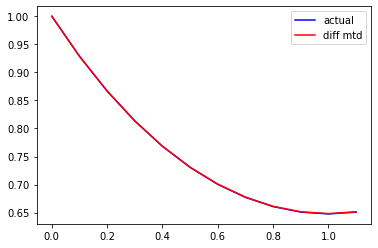

In [42]:
difflist=[X[i] for i in range (0,n+2)]
p=0
plist=[p]
for i in range (0,n+1):
    p+=h
    plist.append(p)
ylist=[(0.119075175*math.exp(xi))+(0.880924825*math.exp(-xi))  for xi in plist]
plt.plot(plist,ylist, color='blue', label='actual')
plt.plot(plist,difflist, color='red', label='diff mtd')
plt.legend()